In [ ]:
# =================================================================
# 1. SETUP AND DATA LOADING (WEEK 1)
# =================================================================

# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import ML/NLP libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
from nltk.corpus import stopwords
import re # for regular expressions in cleaning

# --- Load Data ---
file_name = '../Data/amazon_reviews.csv'
try:
    df = pd.read_csv(file_name)
    print(f"Data loaded successfully. Total rows: {len(df)}")
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Check the file path.")

# Display initial information
print("\n--- Initial Data Info ---")
df.info()
print("\n--- First 5 Rows ---")
print(df.head())

Data loaded successfully. Total rows: 15450

--- Initial Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15450 entries, 0 to 15449
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          14683 non-null  float64
 1   product_category   14679 non-null  object 
 2   product_name       14676 non-null  object 
 3   user_id            14676 non-null  object 
 4   review_title       14682 non-null  object 
 5   review_text        14679 non-null  object 
 6   rating             14682 non-null  float64
 7   verified_purchase  14671 non-null  object 
 8   helpful_votes      14684 non-null  float64
 9   sentiment          14681 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB

--- First 5 Rows ---
   review_id product_category   product_name user_id review_title  \
0        NaN           Beauty       Lipstick   U6138         Okay   
1      466.0            Books  F


Rows after dropping critical NaNs: 13965

--- Sentiment Value Counts ---
sentiment
Negative    6012
Positive    5282
Neutral     2671
Name: count, dtype: int64


C:\Users\langa\AppData\Local\Temp\ipykernel_23048\4061974042.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


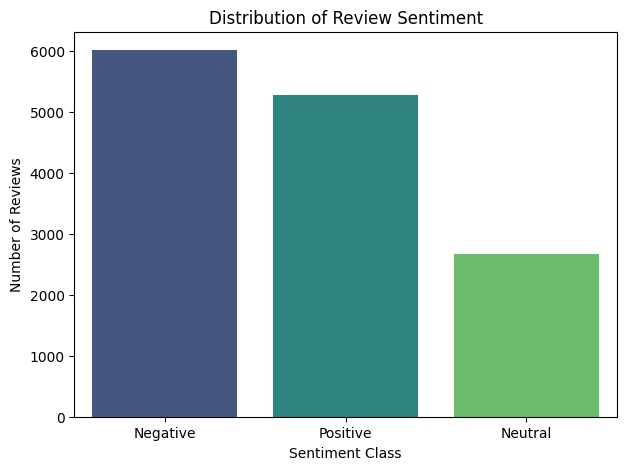


First 5 cleaned reviews:
0    the lipstick works okay but could be better
2    the smartphone stopped working after a week
3            decent cookbook for the price point
4              the sneakers is amazing i love it
5        the microwave oven is amazing i love it
Name: cleaned_review, dtype: object


In [16]:
# =================================================================
# 2. DATA EXPLORATION AND CLEANING (WEEK 2)
# =================================================================

# --- 2.1 Handling Missing Values ---
# Critical step: Drop rows where the review text or sentiment label is missing.
df_cleaned = df.dropna(subset=['review_text', 'sentiment']).copy()
print(f"\nRows after dropping critical NaNs: {len(df_cleaned)}")

# Ensure the sentiment column is a string for consistent handling
df_cleaned['sentiment'] = df_cleaned['sentiment'].astype(str)

# --- 2.2 Exploratory Data Analysis (EDA) ---
# Visualize the distribution of the target variable
sentiment_counts = df_cleaned['sentiment'].value_counts()
print("\n--- Sentiment Value Counts ---")
print(sentiment_counts)

plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribution of Review Sentiment')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Reviews')
plt.savefig('../results/sentiment_distribution.png')
plt.show()

# --- 2.3 Text Preprocessing Function ---
# Define a robust text cleaning function for the main text feature
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags (e.g., <br />)
    text = re.sub(r'<.*?>', '', text)
    # Remove punctuation and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'review_text' column
df_cleaned['cleaned_review'] = df_cleaned['review_text'].apply(clean_text)
print("\nFirst 5 cleaned reviews:")
print(df_cleaned['cleaned_review'].head())

In [17]:
# =================================================================
# 3. FEATURE ENGINEERING AND SELECTION (WEEK 3)
# =================================================================

# --- 3.1 Encoding Target Variable ---
# Convert 'Positive', 'Negative', 'Neutral' labels to 0, 1, 2
le = LabelEncoder()
y = le.fit_transform(df_cleaned['sentiment'])
sentiment_classes = le.classes_
print("\nEncoded Sentiment Classes:", dict(zip(range(len(sentiment_classes)), sentiment_classes)))

# --- 3.2 Vectorization using TF-IDF ---
# TF-IDF (Term Frequency-Inverse Document Frequency) is efficient and effective for text.
tfidf_vectorizer = TfidfVectorizer(
    stop_words='english',           # Use built-in English stop word list
    ngram_range=(1, 2),             # Use single words (unigrams) and two-word phrases (bigrams)
    max_features=10000              # Limit features to top 10k terms for efficiency
)

# Fit the vectorizer on the cleaned text data and transform the text
X = tfidf_vectorizer.fit_transform(df_cleaned['cleaned_review'])

print(f"\nShape of TF-IDF matrix (Features): {X.shape}")


# --- 3.3 Splitting Data ---
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")


Encoded Sentiment Classes: {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

Shape of TF-IDF matrix (Features): (13965, 333)

Shape of X_train: (11172, 333)
Shape of X_test: (2793, 333)


In [25]:
# =================================================================
# 4. MODEL BUILDING (WEEK 4)
# =================================================================

# --- 4.1 Choose and Train Model ---
model = LogisticRegression(
    max_iter=1000,
    random_state=42,
    solver='liblinear',
    class_weight='balanced' # Use class weighting to mitigate imbalance, especially for 'Neutral'
)

print("\n--- Training Logistic Regression Model ---")
model.fit(X_train, y_train)
print("Training Complete.")

# --- 4.2 Make Predictions ---
y_pred = model.predict(X_test)


--- Training Logistic Regression Model ---


C:\Users\langa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


Training Complete.



--- Classification Report ---
              precision    recall  f1-score   support

    Negative       0.59      0.49      0.54      1203
     Neutral       0.39      0.51      0.44       534
    Positive       0.52      0.54      0.53      1056

    accuracy                           0.51      2793
   macro avg       0.50      0.51      0.50      2793
weighted avg       0.53      0.51      0.52      2793

Overall Accuracy: 0.5138


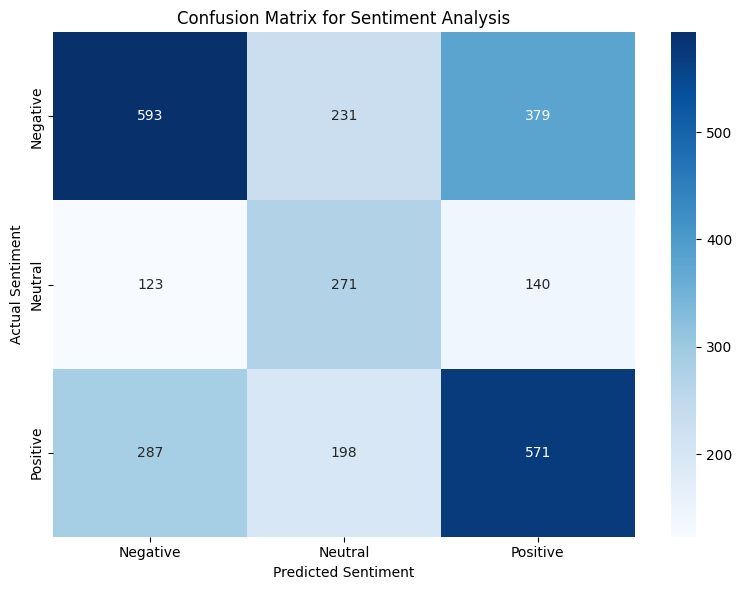


Model and Vectorizer saved to the 'models/' directory.


In [26]:
# =================================================================
# 5. MODEL EVALUATION AND REPORTING (WEEK 5)
# =================================================================

# --- 5.1 Evaluation Metrics ---
target_names = list(sentiment_classes)

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))

accuracy = accuracy_score(y_test, y_pred)
print(f'Overall Accuracy: {accuracy:.4f}')

# --- 5.2 Confusion Matrix Visualization ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=target_names,
    yticklabels=target_names
)
plt.title('Confusion Matrix for Sentiment Analysis')
plt.ylabel('Actual Sentiment')
plt.xlabel('Predicted Sentiment')
plt.tight_layout()
plt.savefig('../results/confusion_matrix.png')
plt.show()

# --- 5.3 Model Saving (Optional for Deployment) ---
import joblib
# Save the model and the vectorizer for later use in deployment/prediction
joblib.dump(model, '../models/logistic_regression_model.pkl')
joblib.dump(tfidf_vectorizer, '../models/tfidf_vectorizer.pkl')
print("\nModel and Vectorizer saved to the 'models/' directory.")

# --- END OF NOTEBOOK ---